# Applying Bias parameter in perceptron using Intel® Python

In this section, we will add a BIAS parameter to the Perceptron Algorithm that we built in the previous notebooks using Intel® Python. Without a bias, the activation function of the perceptron would be forced to pass through the origin (0,0), which can limit its ability to learn patterns in more complex data.

## Objectives

* **Understand** the concept of BIAS parameter;
* **Learn** how to implement BIAS parameter;
* **Adjust** BIAS weights to get more precise results.

## Perceptron Theory: Linearly separable problems.


The perceptron is a learning model that can only solve problems that can be divided into linear segments. This indicates that it can only separate and categorize data that can be divided by a single line or hyperplane.

For cases where data can be divided into two or more different classes and separated by a line or hyperplane in the feature space, the perceptron is appropriate, in other words.

This dynamic is well represented at Figure 1.


<p style="text-align: center;">
 <img src="./images/figure1_perceptron_bias.png"  width="800" height="800">
</p>

Figure 1 - Linear and Non Linear Separable Problems Examples.

From the point of view of a problem with two parameters, when the classification value depends on "AND" and "OR" relationships between inputs, it means that it is a linearly separable problem. In cases where the relationship is "XNOR", it is a non-linearly separable problem, as exemplified in figure 2.

<p style="text-align: center;">
 <img src="./images/figure2_perceptron_bias.png"  width="500" height="500">
</p>

Figure 2 - "AND", "OR", "XNOR" relations at two Parameters Linear separable problems.

## The Problem: The separation line 



The last Perceptron Algorithms classifies data into two classes, to do that they used separation lines that were forced to pass through the origin (0,0). That characteristic limits the model's ability to adjust the line correctly, reducing the accuracy of predictions.

Looking at figure 3, it shows a case of a linearly separable problem where it is not possible to draw the separation line in a way that it passes through the origin. Therefore, it would not be possible to use the models worked on so far to solve this problem.

<p style="text-align: center;">
 <img src="./images/figure3_perceptron_bias.png"  width="800" height="800">
</p>

## The Solution: BIAS parameter


The word "bias" in the context of perceptrons refers to a further parameter that is added to the model's input and acts as an offset or threshold for activation. By moving the decision boundary further from the origin, as illustrated in figure 4, the perceptron is able to segregate data at some specific cases that are linearly separable.

For the best possible prediction accuracy, it can be changed during model training. In other words, the bias allows the model to be more flexible to the data it is trying to learn from and forecast, in addition to enabling the resolution of more specific linear issues.

<p style="text-align: center;">
 <img src="./images/figure4_perceptron_bias.png"  width="500" height="500">
</p>


## Implementing BIAS parameter at Perceptron Neural Network with Intel® Python

Taking the last worked problem "Roses and Violets," let's make a small modification. To classify a flower as a rose or violet, we are going consider both the height and the color of the flower on the spectrum.

Therefore, if a flower have at least 5 units tall and at least 5 units of color, it will be classified as a rose; otherwise, it will be classified as a violet. Thus, we analyze a situation where both height **and** color must be met to be classified as another class.

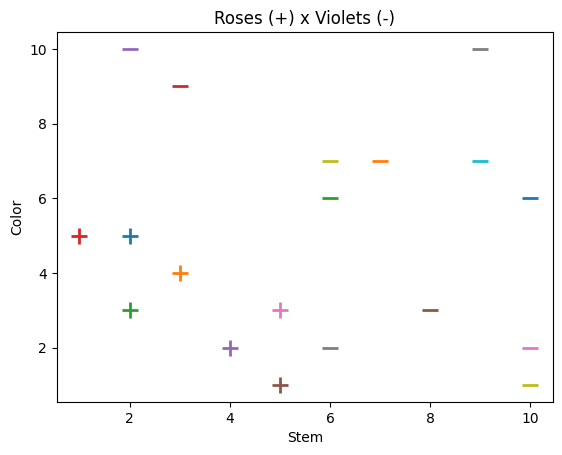

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Activation Function
def activation_fn(x):
  return 1 if x >= 0 else 0


## Inputs: stalk, color

inputs = np.array([
             [ 2, 5], # Rose
             [ 3, 4], # Rose
             [ 2, 3], # Rose
             [ 1, 5], # Rose
             [ 4, 2], # Rose
             [ 5, 1], # Rose
             [ 5, 3], # Rose
             [ 9, 10], # Violet
             [ 6, 7], # Violet
             [ 9, 7], # Violet
             [ 10, 6], # Violet
             [ 7, 7], # Violet                       
             [ 6, 6], # Violet
             [ 3, 9], # Violet
             [ 2, 10], # Violet
             [ 8, 3], # Violet
             [ 10, 2], # Violet
             [ 6, 2], # Violet
             [ 10, 1] # Violet
])

## Expected outcomes for each input.
expected_outputs = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

for result, input in zip(expected_outputs, inputs):
    if result == 1: # Rose
        plt.scatter(input[0], input[1], s=120, marker='+', linewidths=2)
    else: # Violets
        plt.scatter(input[0], input[1], s=120, marker='_', linewidths=2)

plt.xlabel('Stem')
plt.ylabel('Color')
plt.title('Roses (+) x Violets (-)')
plt.show()


To implement BIAS we just need to add one more line at our dot product that will be constant. Or, you can also add one more constant parameter to the inputs, which will be our BIAS. Thus, during the training period of the perceptron weights, it will adjust to the correct height for each problem.

In [172]:
def perceptron_sgd(inputs, expected_outputs):
    weights = np.random.randn(len(input) + 1) / np.sqrt(len(input)) # BIAS weight being inserted randmly with the "+ 1" mathematical term
    learning_rate = 0.1
    epochs = 100

    ## Perceptron weights adjusting  
    inputs = np.c_[inputs, np.ones((inputs.shape[0]))] #BIAS input being inserted at the input vector as 1 constant 
    for _ in range(epochs):
            for i in range(len(inputs)): 
                sample = inputs[i]            
                current_output = activation_fn(np.dot(sample, weights)) 
                if current_output != expected_outputs[i]: 
                  error = expected_outputs[i] - current_output
                  weights += learning_rate * error * sample 
    return weights

weights = perceptron_sgd(inputs,expected_outputs)
print("Weights:")
print(weights)


Weights:
[-0.75152316 -0.41255488  5.16724731]


After the weights training, we are good to test if the Perceptron can classify the flowers:

In [173]:
result_array = []
inputs_bias = np.c_[inputs, np.ones((inputs.shape[0]))]

for i in range(len(inputs_bias)): 
    sample = inputs_bias[i]   
    if activation_fn(np.dot(sample, weights)) > 0.5:
      result_array.append(1)
    else:
      result_array.append(0)
print(result_array)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Now, plot the grafic based on the results:

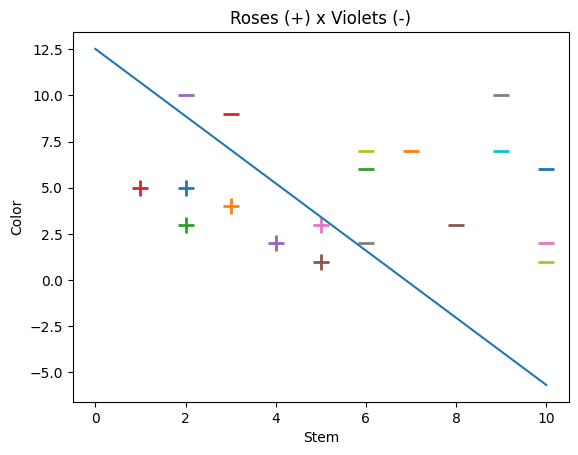

In [175]:
for result, sample in zip(result_array, inputs):
    if result == 1: # rose
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
    else: # violet
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)

plt.xlabel('Stem')
plt.ylabel('Color')
plt.title('Roses (+) x Violets (-)')

#Calculanting the  Decision Boundary:
def f(x):
    return ((-weights[0]/weights[1]))*x + -(weights[2]/weights[1])

x = np.array([0, 10])
y=f(x)
plt.plot(x,y)

plt.plot()
plt.show()